In [2]:
#Imports
import math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import io
from tslearn.utils import *
from tslearn.clustering import TimeSeriesKMeans
from contextlib import redirect_stdout

In [20]:
numCompanies = 9
seed = 0
np.random.seed(seed)
numQuarters = 33

#Get Companies
companiesCSV = pd.read_csv('./DataFrames/Stock data.csv',index_col = 0)
display(companiesCSV)

,Year,Month,Day,Amazon,AMD,Apple,Cisco,Google,IBM,Intel,Nvidia,TI
0,2008,1,2,96.25,7.14,24.2913,20.6960,342.9379,74.7463,17.6125,30.4223,24.3111
1,2008,1,3,95.21,6.77,24.3026,20.8598,343.0080,74.8962,17.1401,30.1827,23.7775
2,2008,1,4,88.79,6.25,22.4474,20.3685,328.8288,72.2046,15.7505,27.6483,22.9434
3,2008,1,7,88.82,6.08,22.1470,20.3763,324.9500,71.4335,15.8964,24.7913,22.9133
4,2008,1,8,87.88,6.00,21.3503,19.8305,316.1562,69.6771,15.4657,25.3166,22.9208
...,...,...,...,...,...,...,...,...,...,...,...,...
2764,2018,12,24,1343.96,16.65,145.0908,39.1732,984.6700,103.8591,42.7631,126.6790,86.0489
2765,2018,12,26,1470.90,17.90,155.3083,41.3031,1047.8500,107.5474,45.3137,132.6801,91.1256
2766,2018,12,27,1461.64,17.49,154.3004,41.7310,1052.9000,109.8549,45.4805,130.7561,91.9391
2767,2018,12,28,1478.02,17.82,154.3795,41.5948,1046.6801,109.1308,45.8631,133.2283,91.9391


In [16]:
#Split companies into their own data structures
#Format each company to a time series for use with tslearn
companyNames = []
companyStockPrices = []
formatted_time_series = []

for company in range(0,numCompanies):
    companyNames.append(companiesCSV.columns.values[company+3])
#    display(companiesCSV.filter(companyNames[company]))
    companyStockPrices.append(companiesCSV.filter(items=[companyNames[company]]))
    
                                

    initialStockPrice = companyStockPrices[company].iloc[0,0]
    for stockPrice in range(0,len(companyStockPrices[company])):
        companyStockPrices[company].iloc[stockPrice,0] -= initialStockPrice
    companyStockPrices[company] = companyStockPrices[company].T
    companyStockPrices[company] = companyStockPrices[company].to_numpy()
    formatted_time_series.append(to_time_series(companyStockPrices[company]))

display(companyNames)
display(companyStockPrices)                              

['Amazon', 'AMD', 'Apple', 'Cisco', 'Google', 'IBM', 'Intel', 'Nvidia', 'TI']

[array([[ 0.00000e+00, -1.04000e+00, -7.46000e+00, ...,  1.36539e+03,
          1.38177e+03,  1.40572e+03]]),
 array([[ 0.  , -0.37, -0.89, ..., 10.35, 10.68, 11.32]]),
 array([[ 0.000000e+00,  1.130000e-02, -1.843900e+00, ...,  1.300091e+02,
          1.300882e+02,  1.315803e+02]]),
 array([[ 0.    ,  0.1638, -0.3275, ..., 21.035 , 20.8988, 21.4434]]),
 array([[ 0.000000e+00,  7.010000e-02, -1.410910e+01, ...,  7.099621e+02,
          7.037422e+02,  7.020221e+02]]),
 array([[ 0.    ,  0.1499, -2.5417, ..., 35.1086, 34.3845, 35.0024]]),
 array([[ 0.    , -0.4724, -1.862 , ..., 27.868 , 28.2506, 28.4272]]),
 array([[  0.    ,  -0.2396,  -2.774 , ..., 100.3338, 102.806 , 102.6565]]),
 array([[ 0.    , -0.5336, -1.3677, ..., 67.628 , 67.628 , 68.3042]])]

In [30]:
numClusters = 4
formatted_dataset = to_time_series_dataset(formatted_time_series)
sz = formatted_dataset.shape[1]
km = TimeSeriesKMeans(n_clusters=numClusters,metric="euclidean",
                                  random_state=seed,n_init=3)   
clusterPredictions = km.fit_predict(formatted_dataset)
display(clusterPredictions)

array([1, 2, 0, 2, 3, 2, 2, 0, 2], dtype=int64)

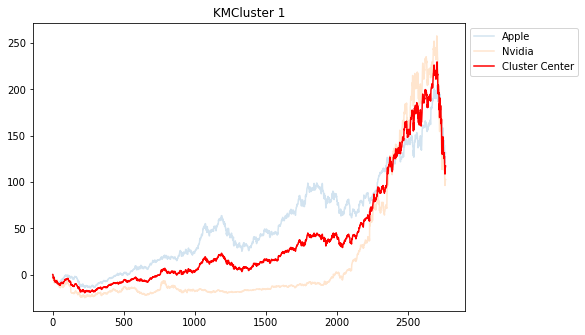

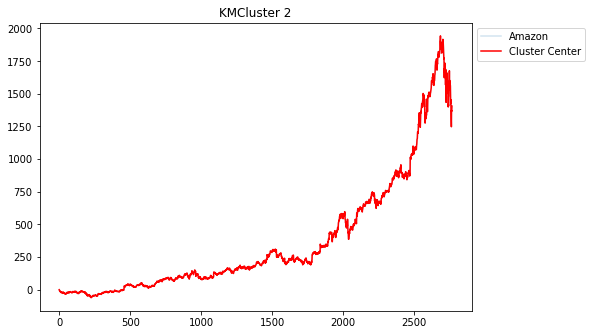

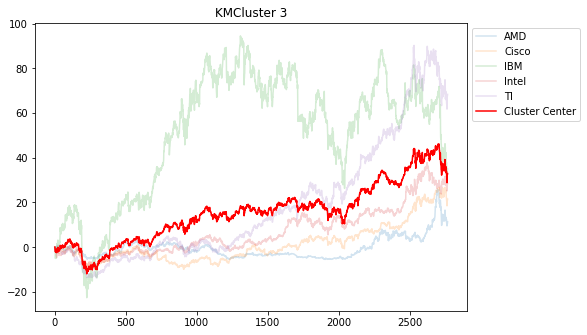

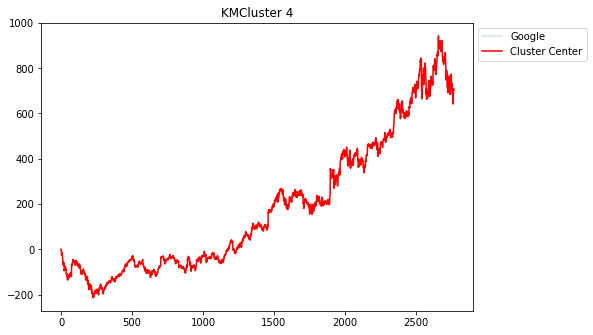

In [31]:
for cluster in range(numClusters):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    for j in range(0,len(formatted_dataset)):
        if(clusterPredictions[j] == cluster):
            xx = formatted_dataset[j]
            ax.plot(xx.ravel(), alpha=.2, label=companyNames[j]) #"k-"
    ax.plot(km.cluster_centers_[cluster].ravel(), "r-", label='Cluster Center') 
    ax.set_title("KMCluster " + str(cluster+1))
    ax.legend(bbox_to_anchor=(1, 1))
    #plt.show()

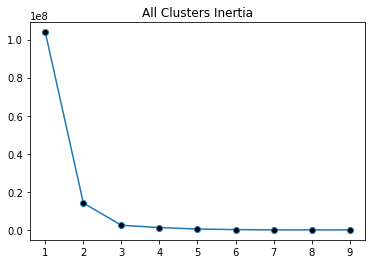

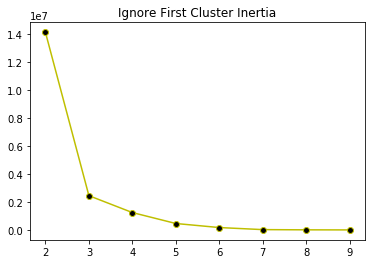

In [32]:
allInertias = []
companyAxis = []
for i in range(1,numCompanies+1):
    numClusters = i
    km = TimeSeriesKMeans(n_clusters=numClusters,metric="euclidean",verbose=True,
                              random_state=seed,n_init=3)

    capturedOutput = io.StringIO()
    with redirect_stdout(capturedOutput):
        clusterPredictions = km.fit_predict(formatted_dataset)
    inertiaOutput = capturedOutput.getvalue()
    inertiaOutputSplit = str.split(inertiaOutput,' --> ')
    inertia = inertiaOutputSplit[-2]
    allInertias.append(float(inertia))
    companyAxis.append(i)


plt.figure()
plt.title("All Clusters Inertia")
plt.plot(companyAxis,allInertias, marker='o', markerfacecolor='black')
plt.figure()
plt.title("Ignore First Cluster Inertia")
plt.plot(companyAxis[1:],allInertias[1:], 'y', marker = 'o', markerfacecolor='black')


In [ ]:
#This is for figuring out dynamic KMeans. Ignore this
def getInertia(capturedOutput):
    inertiaOutput = capturedOutput.getvalue()
    allInertias = str.split(inertiaOutput,' --> ')
    finalInertia = allInertias[-2]
    return finalInertia

def runKMeans(formatted_dataset, seed, numCompanies):
    numClusters = runKMeansPlusPLus(formatted_dataset, seed, numCompanies)
    km = TimeSeriesKMeans(n_clusters=numClusters,metric="euclidean",
                                  random_state=seed,n_init=3)   
    return km.fit_predict(formatted_dataset), km

def runKMeansPlusPLus(formatted_dataset, seed, numCompanies):
    
    inDistances = getLineDistances(allInertias)
    print(inDistances)
    

    plt.scatter(companyAxis,inDistances)
    plt.show()
    #return min{inDistancesIndex}

    return 4
   


def getLineDistances(allInertias):
    """
    firstInertia = allInertias[0]
    firstInertiaSquared = firstInertia**2
    numCompanies = len(allInertias)
    denominator = math.sqrt(firstInertiaSquared+(len(allInertias)-1)**2)
    distances = []
    for i in range(numCompanies):
        numerator = firstInertia*(numCompanies-i) - ((numCompanies-1)*allInertias[i])
        distances.append(numerator/denominator)
    return distances
    """
    
    numCompanies = len(allInertias)
    slope = (-1)*allInertias[0]/(numCompanies-1)
    slopeSquared = slope**2
    #denominator = math.sqrt(slopeSquared+1)
    #print("denominator: " + str(denominator))
    distances = []
    a = slope
    b = -1
    c = allInertias[0] - slope
    denominator = math.sqrt(a*a + b*b)
    for i in range(numCompanies):
        x = i
        y = allInertias[i]
        numerator = math.fabs(a*x + b*y + c)
        print("numerator" + str(i) + ": " + str(numerator))
        distances.append(numerator/denominator)
    x = np.linspace(0,10,100)
    y = slope*x+allInertias[0] - slope
    plt.plot(x,y,'-r')
    return distances